<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span><ul class="toc-item"><li><span><a href="#Business-Case" data-toc-modified-id="Business-Case-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Business Case</a></span></li><li><span><a href="#Business-Value" data-toc-modified-id="Business-Value-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Business Value</a></span></li><li><span><a href="#Strategy" data-toc-modified-id="Strategy-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Strategy</a></span></li></ul></li><li><span><a href="#Import-Packages-&amp;-Data" data-toc-modified-id="Import-Packages-&amp;-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Packages &amp; Data</a></span></li><li><span><a href="#Clean-&amp;-Explore-Data" data-toc-modified-id="Clean-&amp;-Explore-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clean &amp; Explore Data</a></span><ul class="toc-item"><li><span><a href="#Null-Values" data-toc-modified-id="Null-Values-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Null Values</a></span></li><li><span><a href="#Negative-Demand" data-toc-modified-id="Negative-Demand-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Negative Demand</a></span></li><li><span><a href="#Datetime" data-toc-modified-id="Datetime-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Datetime</a></span></li></ul></li><li><span><a href="#EDA-&amp;-More-Cleaning" data-toc-modified-id="EDA-&amp;-More-Cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA &amp; More Cleaning</a></span><ul class="toc-item"><li><span><a href="#Product-Demand" data-toc-modified-id="Product-Demand-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Product Demand</a></span></li><li><span><a href="#Annual-Trends" data-toc-modified-id="Annual-Trends-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Annual Trends</a></span></li><li><span><a href="#Warehouse-Demand" data-toc-modified-id="Warehouse-Demand-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Warehouse Demand</a></span></li><li><span><a href="#Products" data-toc-modified-id="Products-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Products</a></span><ul class="toc-item"><li><span><a href="#Product-Count" data-toc-modified-id="Product-Count-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Product Count</a></span></li><li><span><a href="#Product-Demand" data-toc-modified-id="Product-Demand-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Product Demand</a></span></li><li><span><a href="#Top-100" data-toc-modified-id="Top-100-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Top 100</a></span></li><li><span><a href="#Top-50" data-toc-modified-id="Top-50-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>Top 50</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-4.4.5"><span class="toc-item-num">4.4.5&nbsp;&nbsp;</span>Discussion</a></span></li><li><span><a href="#Top-Product" data-toc-modified-id="Top-Product-4.4.6"><span class="toc-item-num">4.4.6&nbsp;&nbsp;</span>Top Product</a></span><ul class="toc-item"><li><span><a href="#Warehouse-J" data-toc-modified-id="Warehouse-J-4.4.6.1"><span class="toc-item-num">4.4.6.1&nbsp;&nbsp;</span>Warehouse J</a></span></li><li><span><a href="#Groupby-Day" data-toc-modified-id="Groupby-Day-4.4.6.2"><span class="toc-item-num">4.4.6.2&nbsp;&nbsp;</span>Groupby Day</a></span></li></ul></li></ul></li><li><span><a href="#Product-Category" data-toc-modified-id="Product-Category-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Product Category</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Baseline-Models" data-toc-modified-id="Baseline-Models-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Baseline Models</a></span><ul class="toc-item"><li><span><a href="#Daily" data-toc-modified-id="Daily-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Daily</a></span></li><li><span><a href="#Weekly" data-toc-modified-id="Weekly-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Weekly</a></span></li><li><span><a href="#Monthly" data-toc-modified-id="Monthly-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Monthly</a></span></li></ul></li><li><span><a href="#Performance-Metrics" data-toc-modified-id="Performance-Metrics-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Performance Metrics</a></span><ul class="toc-item"><li><span><a href="#Crossvalidation" data-toc-modified-id="Crossvalidation-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Crossvalidation</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li></ul></li><li><span><a href="#Tuned-Model" data-toc-modified-id="Tuned-Model-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Tuned Model</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Recommendations</a></span></li><li><span><a href="#Future-Work" data-toc-modified-id="Future-Work-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Future Work</a></span></li><li><span><a href="#Thank-you!" data-toc-modified-id="Thank-you!-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Thank you!</a></span></li></ul></li></ul></div>

# Intro

## Business Case

A global manufacturer has four warehouses worldwide. They want to implement a product demand strategy to optimize warehouse inventory and increase turn-over rates. 

## Business Value

Warehouses are costly to run. Each square foot of space is valuable. If a product stays on the floor too long, it ends up costing the warehouse more money to store it than profits of its sale would be worth. Conversly, if there is not enough product to meet demand, a shortage can occur, which slows down imperative supply-chains for customers, which decreases customer satisfaction and contributes to the loss of business.

By optimizing between these two, customers remain happy, and valuable floor space is occupied by products with a cost-efficient turn-over rate, saving the manufacturer significantly in profits and customer satisfaction and retention. 

## Strategy

We have counts sold data, but not product pricing or costs data and build a model for it, so we're going to assume units sold relates to profit for our purposes. 

We will therefore select the top-selling product as the highest value product and most important to accurately forecast demand for. We will develop a model for this product to see how accurately we can forecast demand.

**Model**

We're going to be using Facebook's Prophet for time series forecasting. Prophet uses an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data, which is great as this is what we have with out data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet uses a decomposable time series model (Harvey & Peters 1990) with three main model components: trend, seasonality, and holidays. They are combined in the following equation:

<p><center>y(t) = g(t) + s(t) + h(t) + ε<sub>t</sub></center></p>

Where g(t) is the trend function which models non-periodic changes in the value of the time series, s(t) represents periodic changes (e.g., weekly and yearly seasonality), and h(t) represents the effects of holidays which occur on potentially irregular schedules over one or more days. The error term ε<sub>t</sub> represents any changes not accommodated by the model and is assumed to be normally distributed. 

References: 
https://facebook.github.io/prophet/
https://peerj.com/preprints/3190/

**Accuracy Metric**

For our accuracy metric we chose mean absolute percentage error (MAPE). MAPE is commonly used in time series forcasting, however the reason we chose MAPE was for model selection.

We tested baseline models using model frequencies of day, week and month. Since RMSE or MAE would change significantly in proportion of products sold by day, week and month (with day being the lowest and month being the highest) we needed a metric that would be comparable across all frequencies. This is why we chose MAPE as it represents error as a percentage. 

The equation for MAPE is:

<center>MAPE = $\frac{100\%}{n}\sum_{t=1}^{n}\left |\frac{e_t}{y_t}\right|$</center>

Where 
MAPE	=	mean absolute percentage error;
n	=	number of times the summation iteration happens;
${e_t}$	=	error (predicted value - actual value); and
y	=	actual value.

**EDA**

Here we explore relationships between the features and search for any significant or interesting patterns, trends and/or relationships we may find. 

**FEATURES**

The features in this data set are: date, product id, product category, warehouse, and quantity ordered.

# Import Packages & Data

In [1]:
# Import packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

import datetime

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

import itertools

# Filter warnings

import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Data

data = pd.read_csv('Historical_Product_Demand.csv')
df = pd.DataFrame(data)

In [3]:
# Preview Data

df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


# Clean & Explore Data

Since we're fitting time series models, we're going to want to change the Date column to be in datetime format and set it as the index. We'll explore a bit first before getting to that. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 5 columns):
Product_Code        999999 non-null object
Warehouse           999999 non-null object
Product_Category    999999 non-null object
Date                988760 non-null object
Order_Demand        999999 non-null int64
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


We can see the 'Date' column has fewer values than the rest of the columns, which indicates missing data. It doesn't look like much of the data are missing, so if they're indeed null, then we can go ahead and drop those rows.

We can also see that basically every category other than 'Order_Demand' are objects. That's totally fine as we will use them to categorize, however our time series will simply be date and demand.

Let's take a look at our summary statistics for order demand.

In [5]:
# Summary statistics
df.describe().round()

,Order_Demand
count,999999.0
mean,5071.0
std,29603.0
min,-999000.0
25%,20.0
50%,300.0
75%,2000.0
max,4000000.0


We can see a large negative value. This could represent a null, but we will be addressing negative values in the next section. 

Let's check for null values. 

## Null Values

In [6]:
df.isnull().any()

Product_Code        False
Warehouse           False
Product_Category    False
Date                 True
Order_Demand        False
dtype: bool

In [7]:
df[df.Date.isnull() == True]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
45460,Product_1461,Whse_A,Category_019,NaN,10000
456373,Product_1636,Whse_A,Category_019,NaN,100
456374,Product_1461,Whse_A,Category_019,NaN,300
456375,Product_1464,Whse_A,Category_019,NaN,300
456376,Product_1388,Whse_A,Category_019,NaN,200
...,...,...,...,...,...
995790,Product_1464,Whse_A,Category_019,NaN,-900
995791,Product_1541,Whse_A,Category_019,NaN,-200
995792,Product_1388,Whse_A,Category_019,NaN,-300
995793,Product_1541,Whse_A,Category_019,NaN,-300


We can see Warehouse A has some rows with null values for the date. Since this is a time series we do require the date. We'll remove these rows. 

Let's take a closer look at Warehouse A.

In [8]:
# Subset Warehouse A
df[df.Warehouse == 'Whse_A']

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
34593,Product_0905,Whse_A,Category_023,2012/3/7,50
41029,Product_0097,Whse_A,Category_019,2012/1/18,6000
41030,Product_1496,Whse_A,Category_019,2012/3/13,5000
41031,Product_0097,Whse_A,Category_019,2012/4/16,6000
41032,Product_0097,Whse_A,Category_019,2012/9/24,3900
...,...,...,...,...,...
995797,Product_1822,Whse_A,Category_018,2016/3/1,2
995798,Product_1470,Whse_A,Category_019,2016/5/19,100
995799,Product_0599,Whse_A,Category_017,2016/9/15,12
995800,Product_0599,Whse_A,Category_017,2016/10/26,10


It looks like Warehouse A has plenty of data that doesn't have missing dates. Since we will be conducting a time series model, having the date is essential. We will remove these.

Let's see how much of the data we will be removing:

In [9]:
# Calculate percentage of data that is null 
percent_null = (len(df[df.Date.isnull() == True])/len(df))*100
print("{:.2f}".format(percent_null) + "%")

1.12%


Great, just 1.2%. Let's go ahead and drop the null values.

In [10]:
# Drop rows with NaN values (which were only in Date column)
df = df.dropna()

## Negative Demand

Negative demand indicates returns. Since returns aren't immediately available for shipment, we will not include these in our time series.

Also, since we are using MAPE as an accuracy metric, we need y to be greater than 0. I'm not sure why order demand would show up as 0, however we will be removing those numbers also. 

In [11]:
df[df.Order_Demand <= 0]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
46286,Product_0981,Whse_A,Category_028,2012/6/4,0
46287,Product_0981,Whse_A,Category_028,2012/6/8,0
68611,Product_1250,Whse_A,Category_019,2012/3/9,0
68613,Product_1250,Whse_A,Category_019,2012/5/1,0
68615,Product_1250,Whse_A,Category_019,2012/5/25,0
...,...,...,...,...,...
999552,Product_1646,Whse_S,Category_024,2016/6/6,-11
999553,Product_1847,Whse_S,Category_024,2016/6/6,-3400
999554,Product_2167,Whse_S,Category_024,2016/6/6,-50
999608,Product_1817,Whse_S,Category_006,2016/6/6,-472500


In [12]:
# Calculate percentage of data that is null 
percent_neg_vals = len(df[df.Order_Demand <= 0])/len(df)*100
print("{:.2f}".format(percent_neg_vals) + "%")

3.38%


Luckily this as well represents a relatively small proportion of the data. We will go ahead and remove this as well. 

In [13]:
df = df[df.Order_Demand > 0]

## Datetime

Now we'll set the Date column to datetime format.

In [14]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955298 entries, 0 to 999998
Data columns (total 5 columns):
Product_Code        955298 non-null object
Warehouse           955298 non-null object
Product_Category    955298 non-null object
Date                955298 non-null datetime64[ns]
Order_Demand        955298 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 43.7+ MB


Great! Now our Date column is set to datetime format so we can subset our data as needed and create time series from it. Now, to the visual exploration (EDA)!

# EDA & More Cleaning

Let's take a look at product demand for the entire time series. Note: I zoomed in on the x-axis as 2011 data was significantly lower. We'll take a closer look at 2011 following this plot.

## Product Demand

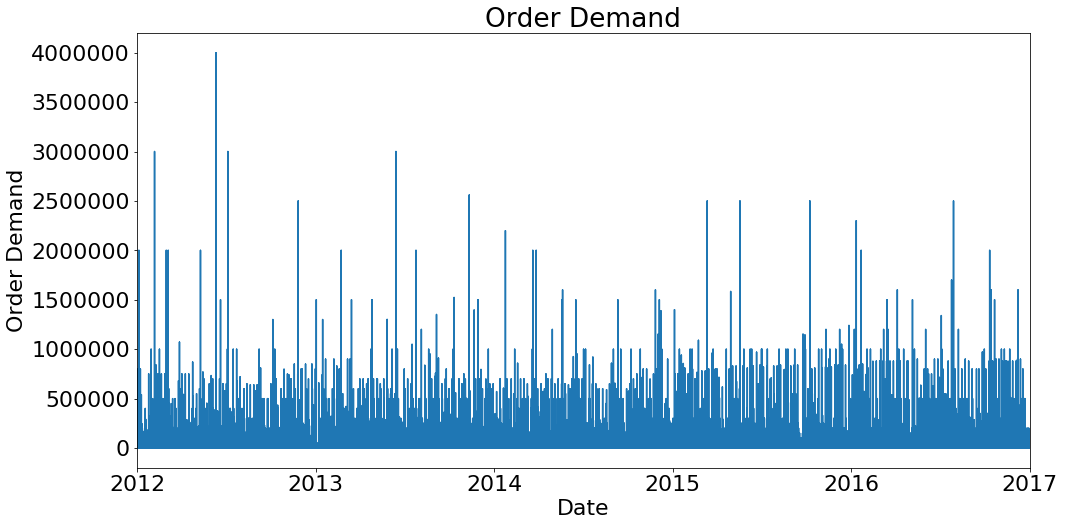

In [91]:
# Plot demand data for entire dataset

# Sort by date first for plotting
df = df.sort_values('Date')

# Set x & y
x = df.Date
y = df.Order_Demand

# Formatting for plots
font = {'family' : 'sans',
        'weight' : 'regular',
        'size'   : 22}
plt.rc('font', **font)

# Plot
plt.figure(figsize=(16,8))
plt.plot(x, y)

# Title & axis labels
plt.title('Order Demand')
plt.xlabel('Date')
plt.ylabel('Order Demand')

# Set x-axis limits (low demand data for 2011 - may be able to remove this year)
plt.xlim([datetime.date(2012, 1, 1), datetime.date(2017, 1, 1)]);

We can see a really big spike mid 2012. I'm curious why. Perhaps there was a promotion or a new product launch or something similar. The demand seems pretty consistent through out the years with a slight drop in Q3 of 2014. 

Let's get a closer look at 2011 (not pictured here as I intentionally zoomed in on the axis for a better visual of the data). 

## Annual Trends

In [16]:
# Create a time series

# Set index to datetime column 
ts_df = df.set_index('Date')

# Select extra columns to drop (everything except 'Order_Demand')
to_drop = ['Product_Code','Warehouse','Product_Category']
# Drop columns
ts = ts_df.drop(to_drop, axis=1)

In [17]:
# Groupby year
ts_yr = ts.groupby(by=ts.index.year).sum()
ts_yr

,Order_Demand
Date,
2011,7936940
2012,945501449
2013,1011653360
2014,1067725423
2015,1097401540
2016,953826365
2017,294701


We can see that  2011 and 2017 are significantly lower. Let's find out why. First, we'll make a visual. 

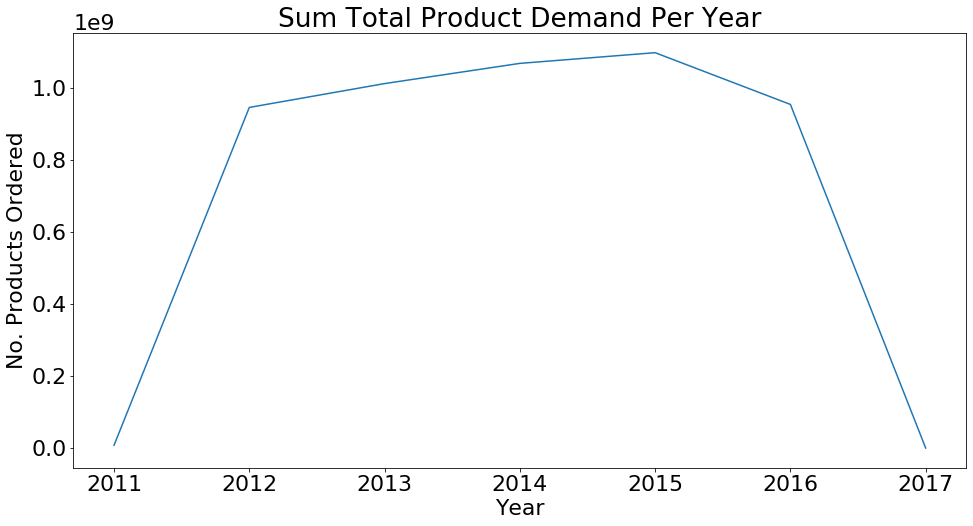

In [18]:
# Plot total product demand vs. year

# Set figure size
plt.figure(figsize=(16,8))
# Plot
plt.plot(ts_yr.index, ts_yr.Order_Demand)
# Title, x & y axis labels
plt.title('Sum Total Product Demand Per Year')
plt.ylabel('No. Products Ordered')
plt.xlabel('Year')
plt.show()

We again can see that demand was significantly lower in 2011 and 2017. I imagine these are either incomplete years or that 2011 was just the beginning, so it took time to gain momentum or perhaps not all of the warehouses were open yet. 

Let's take a closer look to be sure.

In [19]:
# Index time series by year 2011
ts['2011']

,Order_Demand
Date,
2011-01-08,2
2011-05-31,108
2011-06-24,85000
2011-06-24,7000
2011-09-02,1250
...,...
2011-12-30,2750
2011-12-30,3000
2011-12-30,5000


We can see that for 2011 we do have all dates/the entire year present. This may indicate the beginning/when the warehouse(s) were brand new or just starting out. Now let's take a look at 2017.

In [20]:
# Index time series by year 2017
display(ts['2017'].head()) #head
display(ts['2017'].tail()) #tail

,Order_Demand
Date,
2017-01-02,70
2017-01-03,200
2017-01-03,200
2017-01-03,2000
2017-01-04,1000


,Order_Demand
Date,
2017-01-06,10000
2017-01-06,2
2017-01-09,148
2017-01-09,4000
2017-01-09,30


We can see that for this year the data only go through to January 9th, so 2017 is an incomplete year. 

We can see that for those years with data for every day, which are years 2012-2016, the order demand is pretty consistent, with 2012 and 2016 being only slightly lower, and 2017 representing only 9 days of the year. 

So let's go ahead and drop 2011 from our dataset as well as 2017 as it only has data for the first 9 days and is incomplete in terms of weeks or months (which we will be modeling in addition to days).

In [21]:
# Slice 2012 - 2016
ts_df = ts_df['2012':'2016']
# Preview
display(ts_df.head())
display(ts_df.tail())

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-01-01,Product_2166,Whse_S,Category_024,2
2012-01-02,Product_1431,Whse_S,Category_019,1000
2012-01-02,Product_1195,Whse_S,Category_019,5000
2012-01-02,Product_1195,Whse_S,Category_019,5000
2012-01-02,Product_1195,Whse_S,Category_019,5000


,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2016-12-30,Product_0200,Whse_A,Category_007,20
2016-12-30,Product_1733,Whse_S,Category_030,1000
2016-12-30,Product_2009,Whse_S,Category_005,2000
2016-12-30,Product_1503,Whse_A,Category_019,2000
2016-12-30,Product_1419,Whse_A,Category_019,2300


Looks great! Next let's see what's going on with our warehouses and if there are any observable trends, patterns or insights. 

## Warehouse Demand


In [95]:
# Group by warehouse and sum order demand
wh_demand = ts_df.groupby(by=['Warehouse']).sum().round()
wh_demand

,Order_Demand
Warehouse,
Whse_A,145342282
Whse_C,580391083
Whse_J,3318744420
Whse_S,1031630352


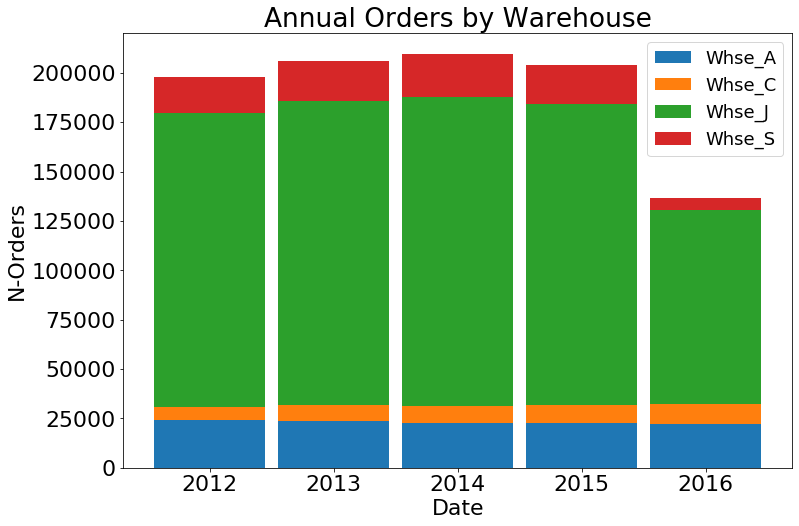

In [93]:
labels = ['2012','2013','2014','2015','2016']
x_ticks = list(range(0,len(labels)))

ts_df.groupby([pd.Grouper(freq='Y'),'Warehouse']).size().unstack().plot(kind='bar',
                                                                        stacked=True,
                                                                        width=0.9,
                                                                        rot=0,
                                                                        figsize=(12,8))
plt.legend(loc='upper right', prop={'size': 18})
plt.title('Annual Orders by Warehouse')
plt.ylabel('N-Orders')
plt.xticks(x_ticks, labels)
plt.show()

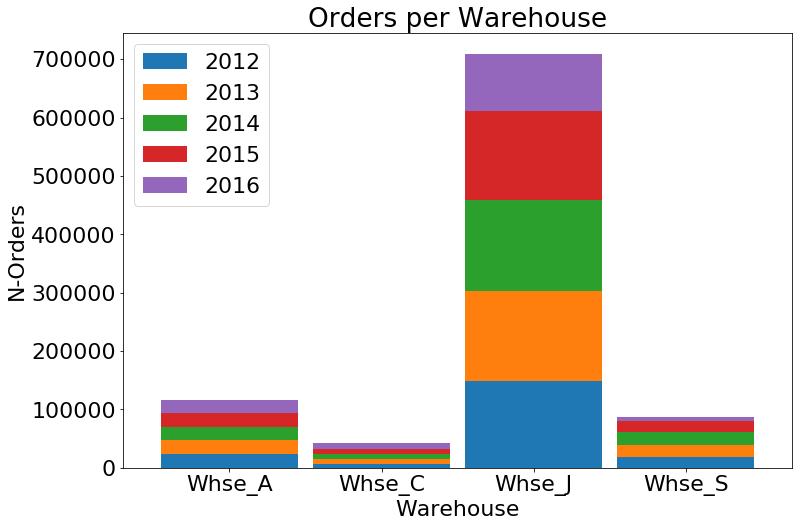

In [98]:
labels = ['2012','2013','2014','2015','2016']
ts_df.groupby(['Warehouse',pd.Grouper(freq='Y')]).size().unstack().plot(kind='bar',
                                                                        stacked=True,
                                                                        width=0.9,
                                                                        rot=0,
                                                                        figsize=(12,8))
plt.legend(labels, loc='upper left')
plt.title('Orders per Warehouse')
plt.ylabel('N-Orders')
plt.show()


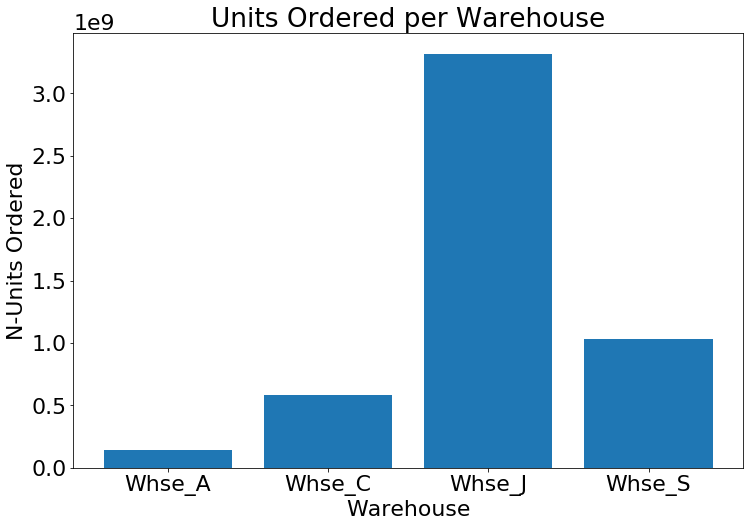

In [99]:
# x-labels
labels = wh_demand.index
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = wh_demand.Order_Demand

# Plot 
# Set figure
plt.figure(figsize=(12,8))
# Prevent extra whitespace 
plt.margins(0.05)
# Plot
plt.bar(products, order_demand, align='center')
# Add labels 
plt.xticks(products, labels)
plt.title('Units Ordered per Warehouse')
plt.ylabel('N-Units Ordered')
plt.xlabel('Warehouse')
plt.show()

Let's look at the total percentage of order demand each warehouse represents.

In [26]:
### Calculate Percentages ###

# Warehouses
whs = ['Whse_J','Whse_S','Whse_C','Whse_A']
# Calc total demand
tot_demand = wh_demand.Order_Demand.sum()
print("Percent of Total Order Demand: \n")
# Calc percentages
for wh in whs:
    demand = wh_demand[wh_demand.index == wh].Order_Demand.values[0]
    percent_demand = (demand/tot_demand)*100
    print(wh + ": {:.2f}".format(percent_demand) + "%")

Percent of Total Order Demand: 

Whse_J: 65.38%
Whse_S: 20.32%
Whse_C: 11.43%
Whse_A: 2.86%


We can see here that Warehouse J has the most demand by a significant amount (more than 3x the following warehouse). This could be the largest warehouse. While Warehouse A represents the smallest amount at less than 3% of total order demand (sum of all units ordered). 

Let's take a closer look at the summary statistics by warehouse.

In [27]:
# Summary statistics by warehouse 
ts_df.groupby(by=['Warehouse']).describe().round()

Order_Demand                                                \
                 count     mean      std  min    25%     50%     75%   
Warehouse                                                              
Whse_A        115755.0   1256.0   4680.0  1.0   15.0   100.0  1000.0   
Whse_C         42066.0  13797.0  59263.0  1.0  100.0  1000.0  6000.0   
Whse_J        709437.0   4678.0  21901.0  1.0   25.0   500.0  2000.0   
Whse_S         87390.0  11805.0  64984.0  1.0   31.0   500.0  4000.0   

                      
                 max  
Warehouse             
Whse_A      345200.0  
Whse_C     3000000.0  
Whse_J     3000000.0  
Whse_S     4000000.0

Warehouse J has the most orders. Warehouse J also has the highest product demand. Warehouse A interestingly has the second highest orders, however it has the lowest product demand, making up just 2.8% of all units ordered.

This is interesting. It would mean perhaps that Warehouse A fulfills a high volume of small orders.

Let's visualize these here. We had to use log order demand as the data are spread over a very large range, which causes a lot of outliers.

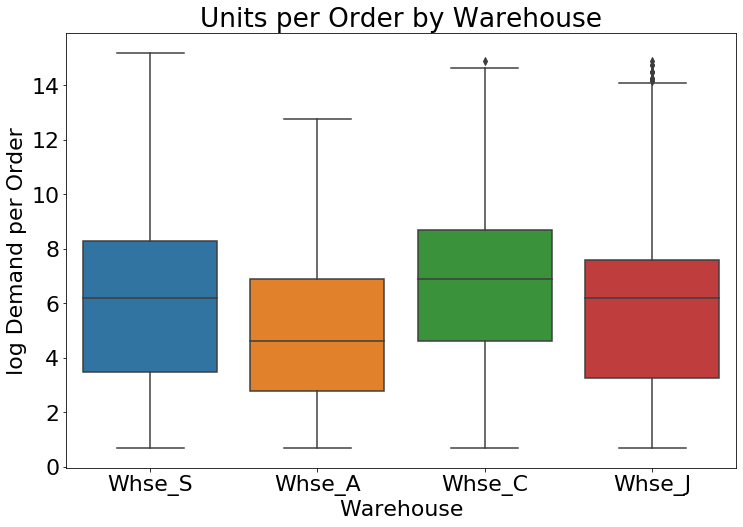

In [101]:
# Set figure size
plt.figure(figsize=(12,8))
# Box plot
sns.boxplot(ts_df['Warehouse'], np.log1p(ts_df['Order_Demand']))
# Title & labels
plt.title('Units per Order by Warehouse')
plt.ylabel('log Demand per Order')
plt.show()

As we could see in the summary statistics and can also see in our plot here, Warehouses C and S actually have the highest average demand (product count) per order.

This is interesting as Warehouse J has the highest total product demand. Warehouse A has the lowest total product demand, however it has the highest number of orders. Additionally as just discussed, Warehouses C and S have the highest average product demand per order.

I would be curious to know how big these warehouses are, who they service (who their customers are) and what types of products they carry as well as what metropolitan or otherwise areas they are located in. 

## Products

### Product Count

Let's see how many products there are in total.

In [29]:
print(f"There are {len(ts_df.Product_Code.unique())} products")

There are 2157 products


Let's now take a look at the demand.

### Product Demand

We're going to sum lifetime product demand by product code and then preview it before visualizing. 

In [30]:
# Group by product code
prod_sum_demand = ts_df.groupby(by=["Product_Code"]).sum()
# Sort descending 
prod_sum_demand = prod_sum_demand.sort_values(by='Order_Demand', ascending=False)
# Take a look at the top 20
print("Top 20 Products:")
display(prod_sum_demand[0:20])

Top 20 Products:


,Order_Demand
Product_Code,
Product_1359,470532000
Product_1248,287924000
Product_0083,210415000
Product_1341,166411000
Product_1295,122447800
Product_1241,115979000
Product_1245,102337000
Product_1286,101346000
Product_1432,96869000


The top products appear to start out pretty high, possibly exponential and then taper out to a slower more linear decrease. 

Let's go ahead and plot the top 100 products so we can observe the trend visually. 

### Top 100

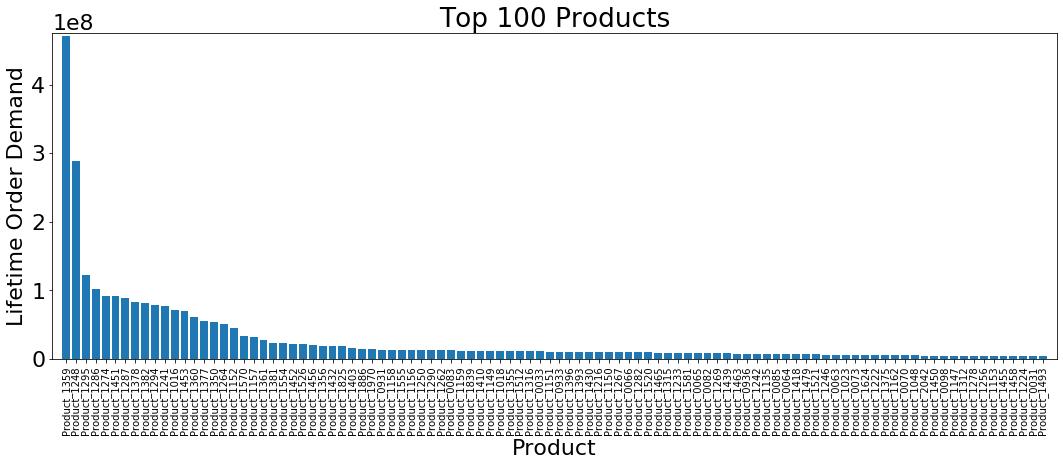

In [105]:
# x-labels
labels = prod_sum_demand.index[0:100]
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = prod_sum_demand.Order_Demand[0:100]

# Plot 
# Set figure
plt.figure(figsize=(18,6))
# Prevent extra whitespace 
plt.margins(0.01)
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels, rotation = 90, fontsize=10)
plt.title('Top 100 Products')
plt.ylabel('Lifetime Order Demand')
plt.xlabel('Product')
plt.show()

We can see how much the demand for products tapers off. Considering this plot shows lifetime demand as well as only the top 100 out of over 2000, there may be many products with demand lower than what would justify stocking or keeping the product on the floor. 

Let's take a closer look at that.

In [32]:
# Print 10 lowest demand products
prod_sum_demand.tail(10)

,Order_Demand
Product_Code,
Product_1793,26
Product_0466,23
Product_0638,22
Product_0633,21
Product_0244,20
Product_1863,19
Product_2151,5
Product_0465,3
Product_1703,2


The manufacturer could most likely save costs by freeing up floor space with the elimination of lower demand products. This would make space for more in-demand products and perhaps new products. Or perhaps even downsizing of the facility and staff to only optimize for top producing products.

While this isn't the main focus of this study, I will include it as a recommendation in the future work section. 

### Top 50

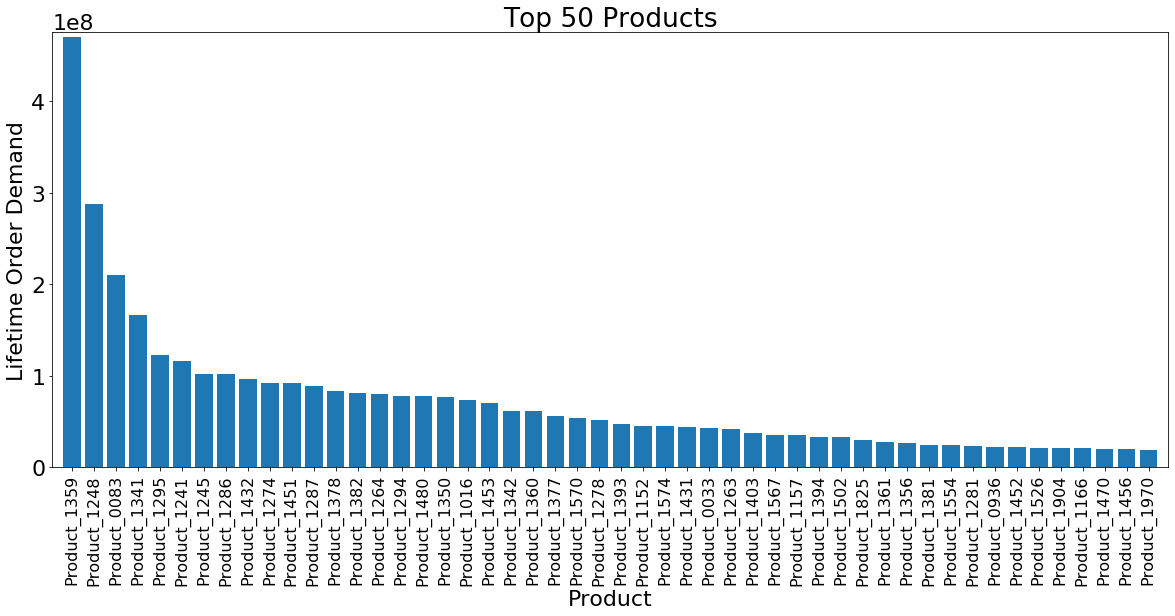

In [33]:
# x-labels
labels = prod_sum_demand.index[0:50]
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = prod_sum_demand.Order_Demand[0:50]

# Plot 
# Set figure
plt.figure(figsize=(20,8))
# Prevent extra whitespace 
plt.margins(0.01)
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels, rotation = 90, fontsize=16)
plt.title('Top 50 Products')
plt.ylabel('Lifetime Order Demand')
plt.xlabel('Product')
plt.show()

### Discussion

**Low Demand Inventory**

We could see in this section visually that a small percentage of available products make up a very large proportion of orders. If we had more detailed information such as profits from each product, we could do a more detailed analysis here to make suggestions on which products to cut from which warehouses.

In an even more detailed analysis it would be good to know footprint of the warehouse as well as number of employees and cost of employees so we could see where things could be culled down and streamlined. How much money can be saved and profits increased. 

If warehouses were to focus on fewer products which make up the greatest amount of orders/profit, could they then hold more stock of the most popular product and increase demand in other ways, such as advertising and saving money on larger purchase orders/more stock/inventory held? 

As this analysis is focused on predicting demand, we will focus on that for now, but will mention the above in future work.

**Top Demand Inventory**

For now let's focus on first modeling and predicting demand for the top most ordered product, and then the model or model-building process can be applied to other products.

Since a warehouse is most likely to run out of the most in-demand product and it is imagined that this would also be one of the most highly profitable products, it makes sense that we would focus on the most ordered product(s) first as these would be the most high-impact products.

### Top Product

In [34]:
# Take a look at top product
top_prod = ts_df[ts_df.Product_Code == 'Product_1359']
# Sort rows by date
top_prod = top_prod.sort_values(by=['Date'])
# Preview
top_prod.head()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-01-05,Product_1359,Whse_J,Category_019,100000
2012-01-05,Product_1359,Whse_J,Category_019,1000
2012-01-05,Product_1359,Whse_J,Category_019,300000
2012-01-05,Product_1359,Whse_J,Category_019,5000
2012-01-05,Product_1359,Whse_J,Category_019,10000


Let's look at total demand for our top product. 

In [35]:
top_prod_demand = top_prod.groupby(by=['Warehouse']).sum().round().sort_values(by=['Order_Demand'], ascending=False)
top_prod_demand

,Order_Demand
Warehouse,
Whse_J,470532000


The top product is only at Warehouse J, which was our highest producing warehouse for total order demand. 

Let's look at demand for their other products. 

#### Warehouse J

Products at Warehouse J. 

In [36]:
# Index by Whse_J
whse_j_prod_demand = ts_df[ts_df.Warehouse == 'Whse_J'].groupby(by=["Product_Code"]).sum().sort_values(by=['Order_Demand'], ascending=False)
# Preview top 20
whse_j_prod_demand.head(20)

,Order_Demand
Product_Code,
Product_1359,470532000
Product_1248,287924000
Product_1295,122447800
Product_1286,101346000
Product_1274,92478000
Product_1451,91749000
Product_1287,88433000
Product_1378,83272100
Product_1382,81537500


In [37]:
# Calculate number of products at warehouse J
tot_prods_whse_j = len(prod_sum_demand)
print(f"N Products at Whse J: {tot_prods_whse_j}")

N Products at Whse J: 2157


In [38]:
# Percentage of all Whse_J product demand
perc_j = ((whse_j_prod_demand[0:100].sum()/whse_j_prod_demand.sum()).values[0])*100
print("{:.2f}".format(perc_j) + "%")

86.54%


The top 100 products make up 86.54% of the demand. 

In [39]:
# Calc total demand
tot_demand = whse_j_prod_demand.Order_Demand.sum()
print("Percent of Total Order Demand at Warehouse J: \n")

# Calc percent
demand = whse_j_prod_demand[whse_j_prod_demand.index == 'Product_1359'].Order_Demand.values[0]
percent_demand = (demand/tot_demand)*100
print("Product_1359: {:.2f}".format(percent_demand) + "%")

Percent of Total Order Demand at Warehouse J: 

Product_1359: 14.18%


In [40]:
# Group by product code
prod_sum_demand = whse_j_prod_demand.groupby(by=["Product_Code"]).sum()
# Sort descending 
prod_sum_demand = prod_sum_demand.sort_values(by='Order_Demand', ascending=False)
# Take a look at the top 20
print("Top 20 Products:")
display(prod_sum_demand[0:20])

Top 20 Products:


,Order_Demand
Product_Code,
Product_1359,470532000
Product_1248,287924000
Product_1295,122447800
Product_1286,101346000
Product_1274,92478000
Product_1451,91749000
Product_1287,88433000
Product_1378,83272100
Product_1382,81537500


Let's visualize these like we did for all warehouses.

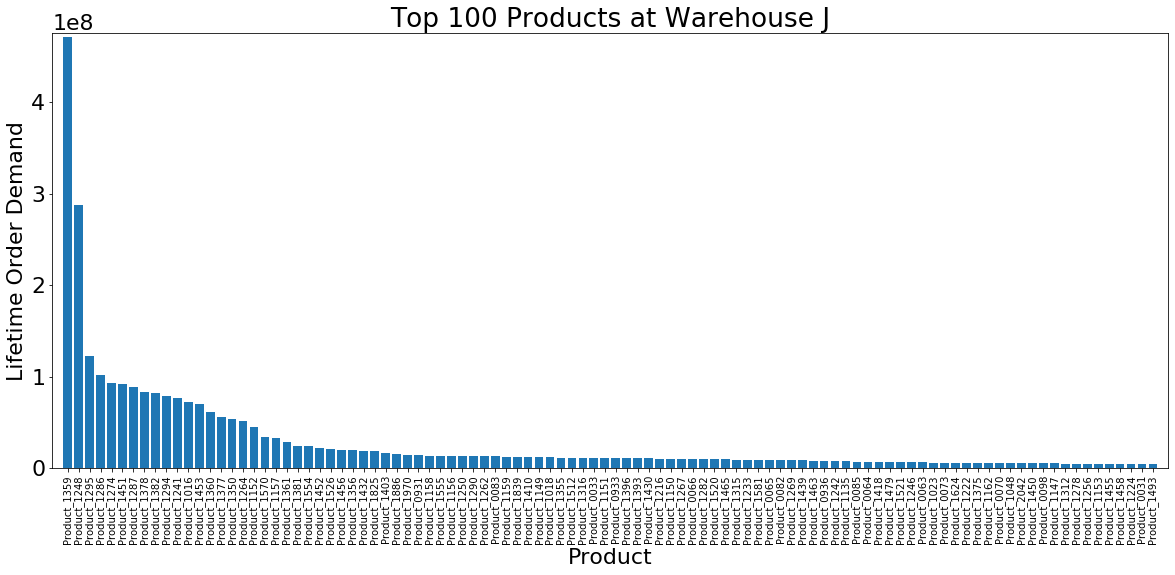

In [41]:
# x-labels
labels = prod_sum_demand.index[0:100]
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = prod_sum_demand.Order_Demand[0:100]

# Plot 
# Set figure
plt.figure(figsize=(20,8))
# Prevent extra whitespace 
plt.margins(0.01)
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels, rotation = 90, fontsize=10)
plt.title('Top 100 Products at Warehouse J')
plt.ylabel('Lifetime Order Demand')
plt.xlabel('Product')
plt.show()

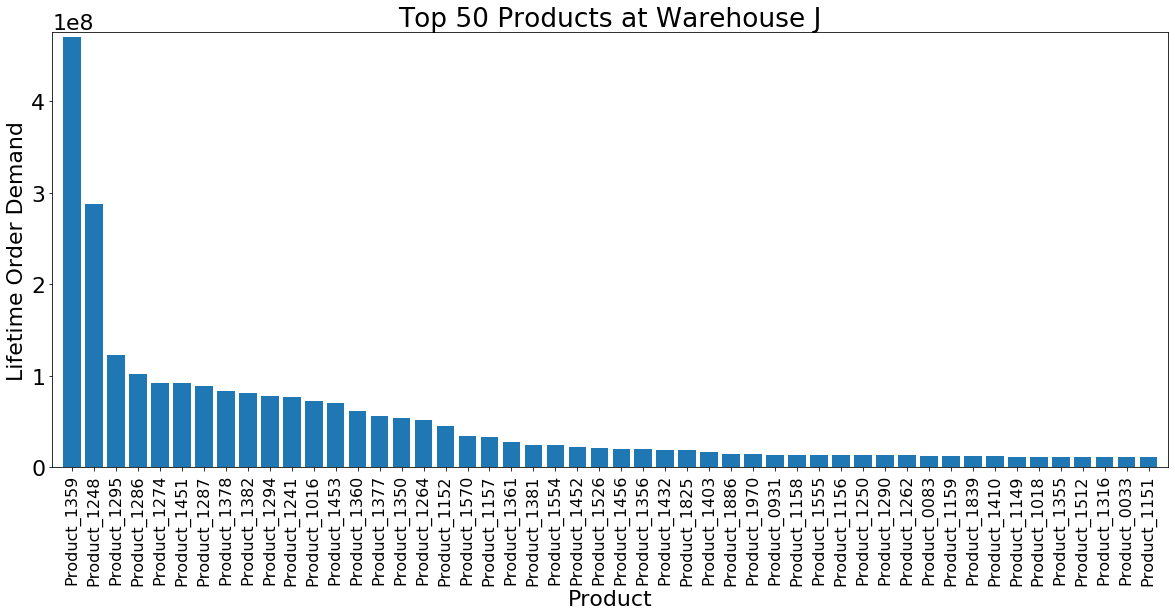

In [42]:
# x-labels
labels = prod_sum_demand.index[0:50]
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = prod_sum_demand.Order_Demand[0:50]

# Plot 
# Set figure
plt.figure(figsize=(20,8))
# Prevent extra whitespace 
plt.margins(0.01)
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels, rotation = 90, fontsize=16)
plt.title('Top 50 Products at Warehouse J')
plt.ylabel('Lifetime Order Demand')
plt.xlabel('Product')
plt.show()

We can see a similar trend here as we did for all warehouses. There are top products, and then it drops off drastically, with demand for the majority of products being quite low comparatively. 

#### Groupby Day

In [111]:
top_prod_day = top_prod.groupby(pd.Grouper(freq='D')).sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [44]:
top_prod_day.describe().round()

,Order_Demand
count,1820.0
mean,258534.0
std,296815.0
min,0.0
25%,0.0
50%,196000.0
75%,394000.0
max,2252000.0


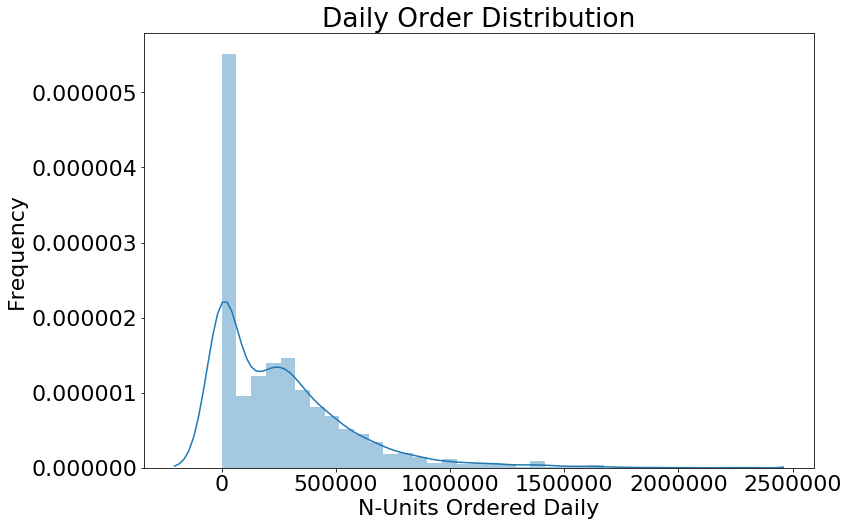

In [110]:
plt.figure(figsize=(12,8))
sns.distplot(top_prod_day)
plt.title('Daily Order Distribution')
plt.xlabel('N-Units Ordered Daily')
plt.ylabel('Frequency')
plt.show()

When we group by day we can see that there are a lot of days where no orders for the top product were made. We're going to change those to 1 so we can calculate MAPE.

In [46]:
# Calculate % of data with daily product demand <= 0 
print('{:.2f}%'.format(len(top_prod_day[top_prod_day.Order_Demand == 0 ])/len(top_prod_day)*100))

32.53%


This is a pretty significant amount, which makes me wonder if this is following a M-F trend. That wouldn't explain all of it, however 28.57% of the week is Saturday and Sunday. 

In [114]:
# Add 1 to 0 days for MAPE calculation
top_prod_day.Order_Demand[top_prod_day.Order_Demand == 0] = 1

## Product Category

Let's take a closer look at the highest demand product category.

In [115]:
# Group by product category & sum order demand
top_cat = ts_df.groupby(by=['Product_Category']).sum()
# Sort descending by order demand
top_cat = top_cat.sort_values(by=['Order_Demand'], ascending=False)
# Preview top 5
top_cat.head()

,Order_Demand
Product_Category,
Category_019,4202550692
Category_006,394045658
Category_005,194919040
Category_007,127502866
Category_028,47728372


We can see that Category 19 is the most demanded product. This makes sense as it is the category that our most in-demand product belongs to.  Let's visualize this!

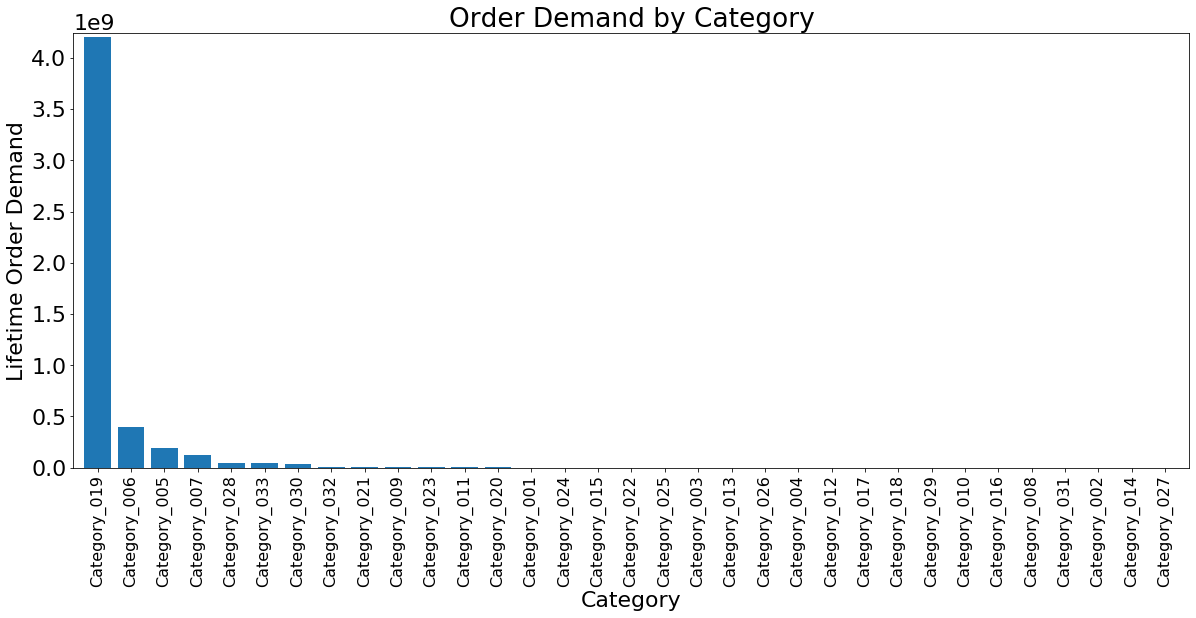

In [116]:
# x-labels
labels = top_cat.index
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = top_cat.Order_Demand

# Plot 
# Set figure
plt.figure(figsize=(20,8))
# Prevent extra whitespace 
plt.margins(0.01)
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels, rotation = 90, fontsize=16)
plt.title('Order Demand by Category')
plt.ylabel('Lifetime Order Demand')
plt.xlabel('Category')
plt.show()

Category 19 is by far the most in demand product. This is also the category that our top demand product belongs to. 

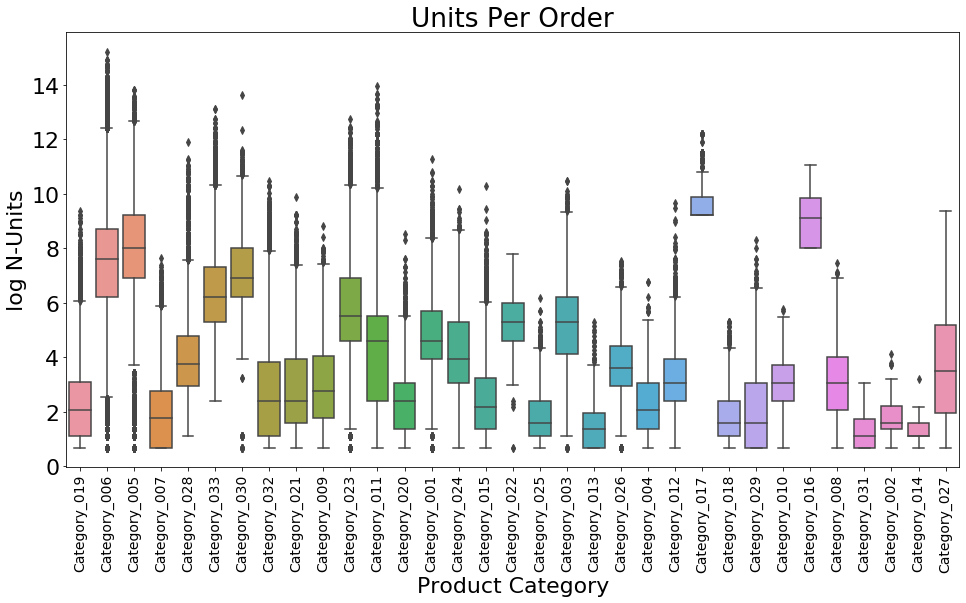

In [118]:
# Set figure size
plt.figure(figsize=(16,8))
# Box plot
sns.boxplot(ts_df['Product_Category'], np.log1p(ts_df['Order_Demand']))
plt.xticks(products, labels, rotation = 90, fontsize=14)
plt.title('Units Per Order')
plt.xlabel('Product Category')
plt.ylabel('log N-Units')
plt.show()

This plot is interesting, because what it shows is that our top producing category (Category 19) actually has fewer demand per order than many other product categories. This would indicate that it is ordered both frequently and perhaps from many different customers. Whatever the products in this category may be it seems they are used by many and frequently. 

# Modeling 

## Baseline Models

**Accuracy Metric**

In order for our model to calculate MAPE, the Order Demand values must be greater than 0. So as before, we're going to add 1 to days with 0 orders. 

**Negative Demand**

Negative demand indicates returns were made that day. However, we don't know if the returns logged that day are immediately available to be shipped out. Therefore they are not useful in knowing how much product to have on hand to meet demand.

**Baseline Models**

We're going to first define some functions so we can repeat our baseline model on different frequencies e.g. day, week, and month. Our functions will return:

- Accuracy metric (MAPE)
- Time series plot with historical data, our fitted model, changepoints and our predictions forecast
- Components plots
- Return dataframe of forecasts

In [86]:
# Update formatting for plots
font = {'family' : 'sans',
        'weight' : 'regular',
        'size'   : 12}
plt.rc('font', **font)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    '''
    Calculate mean absolute percentage error (MAPE)
    
    Input: 
        y_true: Actual values
        y_pred: Predicted values
    Return:
        MAPE in fraction terms
    '''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    return mape

# Define function for baseline models
def ts_model(ts_df, freq='D', periods=365, cps=0.05, sps=10):
    '''
    Function takes in time series data frame and returns model 
    forecast, accuracy score, time series forecast with changepoints,
    and plot components.
    
    Inputs:
        ts_df : Time series data frame
        freq : Frequency to group data by 
            (default='D') e.g. 'D','W','M'
        periods : Periods to forecast into the future
            (default=365) e.g. 365, 52, 12
            in relation to the frequency
        cps : changepoint prior scale (default = 0.05)
        sps : seasonal prior scale (default = 10)
            
    Outputs:
        Returns: 
            Forecast : Data frame of predictions
        Prints: 
            Accuracy Metric : MAPE
            Time Series Forecast : Plot
            Plot Components : Plots showing trends:
                overall trend, weekly and monthly    
    '''
    
    ### Group data by Frequency ###
    
    # Group by frequency
    top_prod = ts_df.groupby(pd.Grouper(freq=freq)).sum()
    
    # Change zeros to 1 for mape calculation
    top_prod.Order_Demand[top_prod.Order_Demand == 0] = 1

    ### Convert to fbprophet format ###

    # Move datetime index to column
    top_prod.reset_index(inplace=True)
    # Rename columns for fbprophet format
    top_prod = top_prod.rename(columns={'Date':'ds', 'Order_Demand': 'y'})

    ### Instantiate & Fit Model ###

    # Instantiate model
    m = Prophet(interval_width=0.95, 
                changepoint_prior_scale=cps,
                seasonality_prior_scale=sps
                )
        
    # Fit model
    m.fit(top_prod)

    ### Forecast & Predict ###

    # Forcasting 
    future = m.make_future_dataframe(periods=periods, freq=freq)
    # Predict
    forecast = m.predict(future)
    
    ### Accuracy Metric ###
    y_true = top_prod.y
    y_pred = forecast.yhat[0:-periods]
    mape = mean_absolute_percentage_error(y_true,y_pred)
    print(f"MAPE: {mape} \n")

    ### Plot Time Series & Components ###

    # Plot forecast
    print('Time Series Forecast:')
    figure1 = m.plot(forecast, xlabel = 'Date', ylabel = 'Order Demand',uncertainty=True)
    # Add change points
    a = add_changepoints_to_plot(figure1.gca(), m, forecast)
    plt.show()
    # Plot components
    print('Time Series Components:')
    figure2 = m.plot_components(forecast)
    plt.show()

    return forecast

### Daily 

Apply function to model daily demand forecast.

MAPE: 23573.902923600974 

Time Series Forecast:


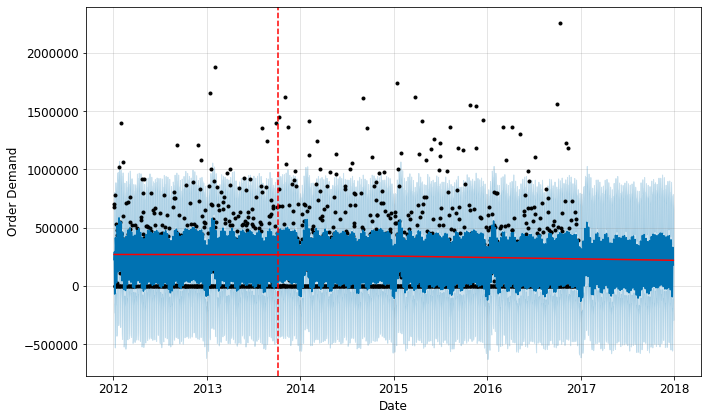

Time Series Components:


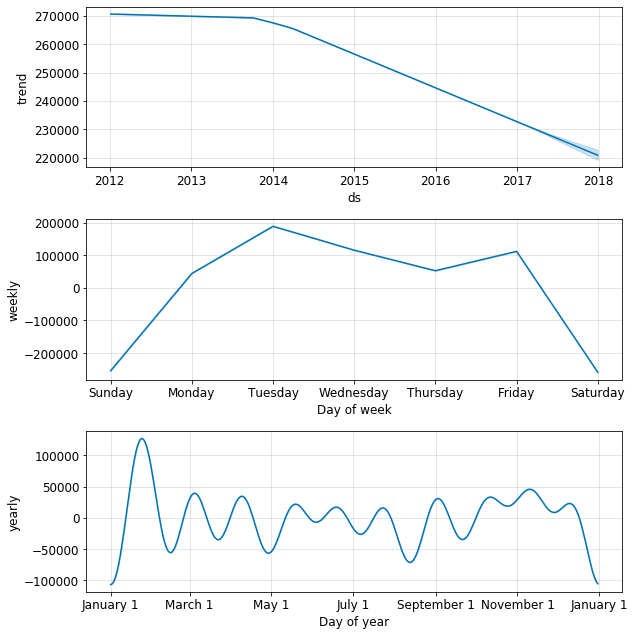

In [52]:
daily_forcast = ts_model(top_prod, freq='D', periods=365)

**Trend**

We can see there was a changepoint in late 2013 when this product started trending downward at a much greater slope.

**Weekly**

Demand for this product appears to peak Tuesday, followed by Friday and then Monday. Dropping off on weekends, which would be consistent with usual business hours as this warehouse most likely services B2B rather than B2C.

**Yearly**

There appears to be a peak in demand for this product in late January/early February, with a minimum January 1st.

### Weekly 

Apply function to model weekly demand forecast.

MAPE: 12125.220123331761 

Time Series Forecast:


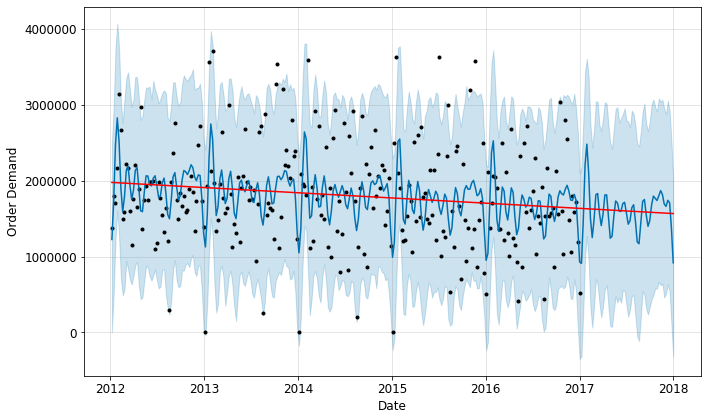

Time Series Components:


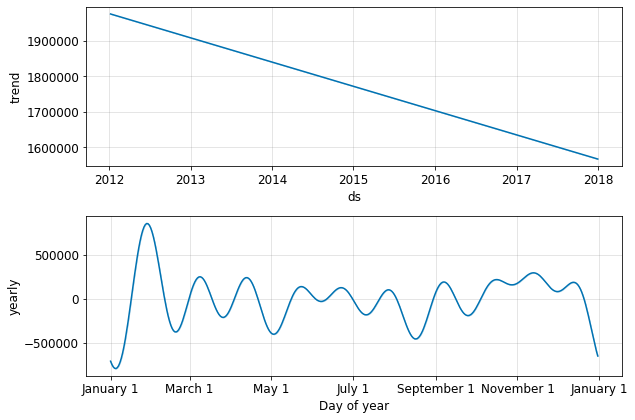

In [53]:
weekly_forecast = ts_model(top_prod, freq='W', periods=52)

**Trend**

We lose the changepoint here as this just shows a straight downward trend. It does still show the same trend for the peak and minimum. 

**Yearly**

Slowing down after the holidays, in the new year, with a sharp peak in late January/eary February as everyone perhaps gets back to business. 

### Monthly 

Apply function to model monthly demand forecast.

MAPE: 0.08653561964654201 

Time Series Forecast:


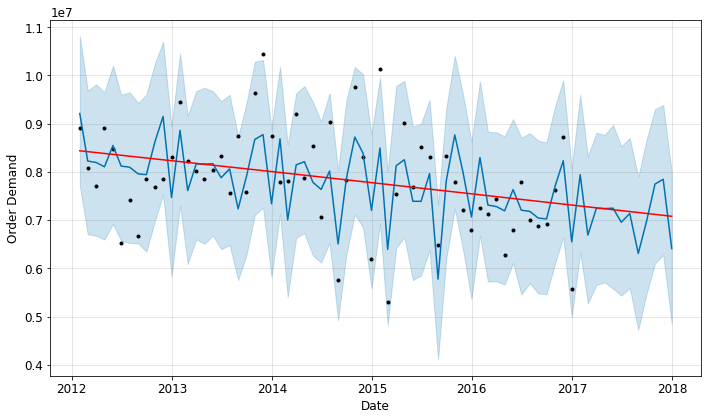

Time Series Components:


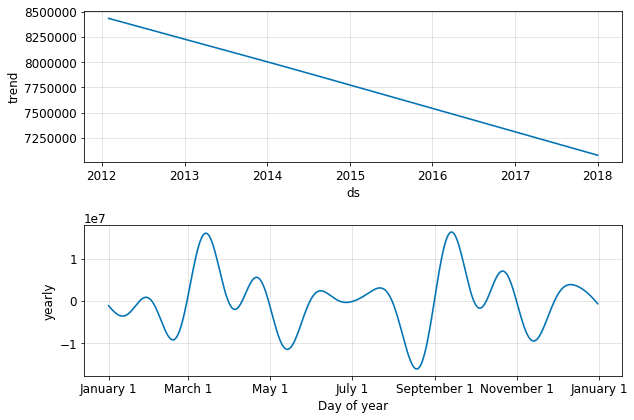

In [54]:
monthly_forecast = ts_model(top_prod, freq='M', periods=12)

**Trend**

Same downward trend as our weekly model.

**Yearly**

We seem to lose the detail of the holiday and new year trends. Something to keep in mind. 

**MAPE** 

This model had the lowest MAPE value by far at 8.65%. Daily and weekly experience a lot more variability, so it makes sense that our monthy model resulted in the most accurate prediction. 

## Performance Metrics

### Crossvalidation

Now we're going to measure the forecast error using historical data. This is done by fbprophet by selecting cutoff points in the history, and for each of the cutoff points, fitting the model using data only up to that cutoff point. 

We'll then compare the forecasted values to the actual values and return a plot with the rolling average of MAPE values. A forecast is made for every observed point between the cutoff and the cutoff + the horizon.

Reference: https://facebook.github.io/prophet/docs/diagnostics.html

In [55]:
### Cross validation ##

def crossval(ts_df, freq='D'):
    '''
    Calculate cross validation for each of our models
    
    Input: 
        ts_df : Data frame with our relevant time series data
        freq : Frequency to group data by e.g. 'D','W','M'
            Default = 'D'
            
    Output:
        Returns : Table of performance metrics
        Plots: Rolling average of MAPE across different horizons
    '''
    
    # Group by day
    top_prod = ts_df.groupby(pd.Grouper(freq=freq)).sum()
    
    # Change 0 to 1 for MAPE calculation
    top_prod.Order_Demand[top_prod.Order_Demand == 0] = 1
        
    # Set index to datetime
    top_prod.reset_index(inplace=True)
    # Rename columns for fbprophet format
    top_prod = top_prod.rename(columns={'Date':'ds', 'Order_Demand': 'y'})

    ### Instantiate & Fit Model ###

    # Instantiate model
    m = Prophet(interval_width=0.95)
    # Fit model
    m.fit(top_prod)

    ### Cross Validate ### 
    top_prod_d_cv = cross_validation(m, initial='365.25 days', period='365.25 days', horizon = '365.25 days')

    # Performance metrics
    top_prod_p = performance_metrics(top_prod_d_cv)

    # Get min & max MAPE
    min_mape = top_prod_p.sort_values(by=['mape']).head(1)['mape'].round(4).values[0]
    max_mape = top_prod_p.sort_values(by=['mape'], ascending=False).head(1)['mape'].round(4).values[0]

    # Print accuracy metric  
    print(f'Min MAPE: {min_mape}')
    print(f'Max MAPE: {max_mape}')

    ### Plot Metrics ###

    fig = plot_cross_validation_metric(top_prod_d_cv, metric='mape')
    
    # Title
    if freq == 'D':
        plt.title('MAPE : Day')
    elif freq == 'W':
        plt.title('MAPE : Week')
    elif freq == 'M':
        plt.title('MAPE : Month')
        plt.ylim([0,1])
                  
    plt.show()
    
    return top_prod_p # Performance metrics 

Min MAPE: 5937.8241
Max MAPE: 74512.0174


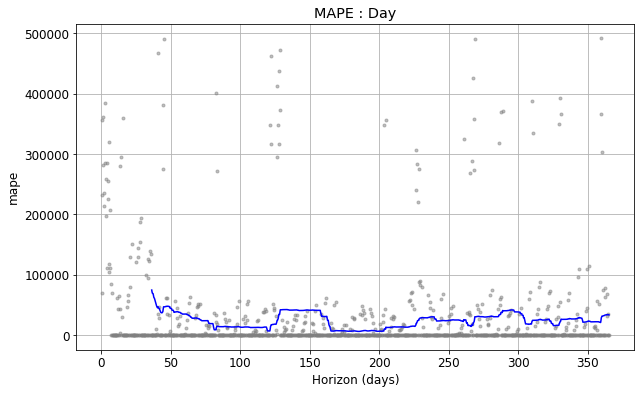

Min MAPE: 0.2832
Max MAPE: 136589.8194


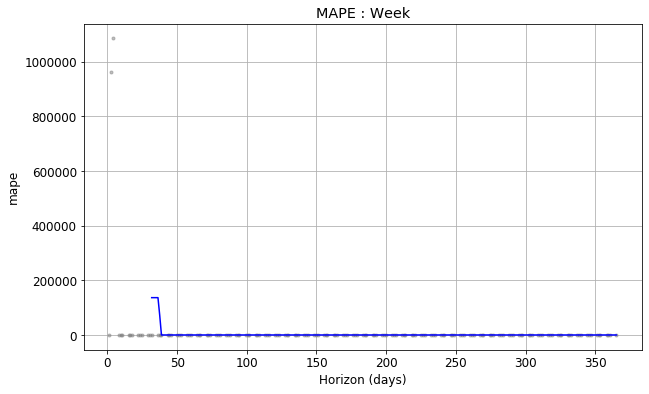

Min MAPE: 0.0657
Max MAPE: 0.4199


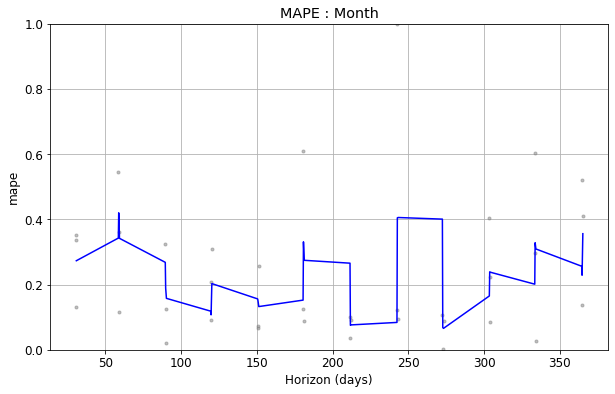

In [56]:
### Run Cross Validation for all 3 Models ###

freqs = ['D','W','M']
perform_metrics = []
for freq in freqs:
    pm = crossval(top_prod, freq=freq)
    perform_metrics.append(pm)

We can see again here that our monthly model performs the best, with a range of 6.57% - 41.99%. 

Our weekly has a very high MAPE early in the horizon prediction, however 

Let's print out the prediction horizons of the minimum MAPE. 

In [57]:
# Print from performance_metrics above
for i,j in enumerate(['Day','Week','Month']):
    print(f"{j}:")
    display(perform_metrics[i].sort_values(by=['mape'])[:1])

Day:


,horizon,mse,rmse,mae,mape,coverage
449,185 days 18:00:00,5.720678e+10,239179.395503,161175.123156,5937.824109,0.93578


Week:


,horizon,mse,rmse,mae,mape,coverage
99,262 days 18:00:00,2.507374e+11,500736.882192,432003.509055,0.283202,1.0


Month:


,horizon,mse,rmse,mae,mape,coverage
24,273 days 06:00:00,3.920751e+11,626159.04067,505684.548785,0.065742,1.0


We can see here that for month the minimum MAPE was at a prediction horizon of 273 days. 

### Hyperparameter Tuning

**Grid Search**

We're going to conduct a grid search to optimize our model by selecting the hyperparameter values that result in the lowest MAPE when crossvalidating. 

The hyperparameters we are tuning are:
- changepoint_prior_scale
- seasonality_prior_scale

**changepoint_prior_scale** determines how much the trend changes at the trend changepoints. It's values are on a log scale and apply a Lasso penalty. If it's too small the trend will be underfit and too large the trend will be overfit. 

**seasonality_prior_scale** determines the flexibility of seasonality. Also on a log scale and applies an L2 penalty like in Ridge regression. A large value allows the seasonality to fit large fluctuations, a small value shrinks the magnitude of the seasonality. The default is 10, which applies basically no regularization. *This is what our model ended up optimizing for.*

Reference: https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning

In [58]:
# Move datetime index to column
top_prod.reset_index(inplace=True)
# Rename columns for fbprophet format
top_prod = top_prod.rename(columns={'Date':'ds', 'Order_Demand': 'y'})


param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [3, 5, 10, 15],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes = []  # Store MAPE for each param here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(top_prod)  # Fit model with given params
    df_cv = cross_validation(m, horizon='365.25 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale      mape
0                     0.001                        3  6.861847
1                     0.001                        5  6.890634
2                     0.001                       10  6.850401
3                     0.001                       15  6.858781
4                     0.010                        3  6.831725
5                     0.010                        5  6.873912
6                     0.010                       10  6.827331
7                     0.010                       15  6.873161
8                     0.100                        3  7.398827
9                     0.100                        5  7.378499
10                    0.100                       10  7.378974
11                    0.100                       15  7.366897
12                    0.500                        3  7.494583
13                    0.500                        5  7.433320
14                    0.500                       10  7

Identify best parameters as parameter values that minimize MAPE.

In [59]:
best_params = all_params[np.argmin(mapes)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10}


**Model Improved**

Cool! We can see with the above best parameters we have improved our model's performance from a MAPE of 8.65% to 6.83%. 

Also to note: a seasonality prior scale of 10 represents yearly seasonality in fbprophet. 

Ref: https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html

## Tuned Model

Now let's go ahead and plug in the optimal hyperparameter values.

MAPE: 0.06470390334283226 

Time Series Forecast:


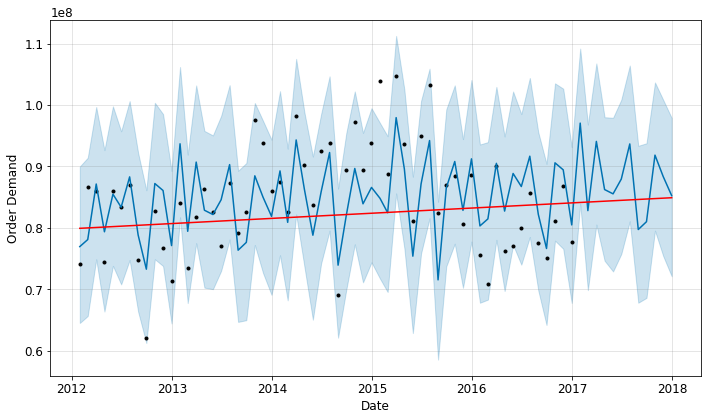

Time Series Components:


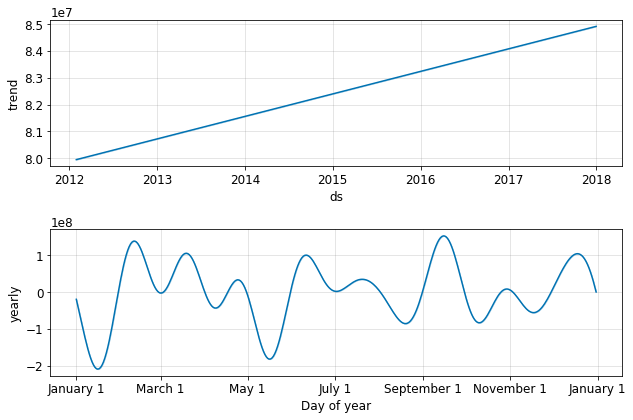

In [89]:
monthly_tuned = ts_model(ts_df, freq='M', periods=12, cps=0.01, sps=10)

6.47% error for our monthly inventory prediction for the most in-demand product. This is great! 

What's interesting to note though is that our tuned model shows an opposite trend from our original model. Perhaps this was due to our optimal change point and seasonal prior scales, which were not present in our baseline model. 

This process could be streamlined and replicated for each of the products.

# Conclusion

**Model Selection**

Of our three frequencies of day, week and month, our model with **monthly frequency** performed significantly better than our day and weekly batched models. This is because there was so much variation in the data. Some days 0 products were ordered and other days millions of products were ordered. 

**Accuracy Score**

Once tuning our model by running a grid search on select hyperparameters, and then fitting our model with the optimized hyperparameters, we were able to predict monthly product demand with just **6.47%** error rate (MAPE). This is considered an excellent score and the model performed very well. 

**Trend**

This product originally appeared to be trending downward, however when we tuned our hyperparameters: change point and seasonality prior scales, our model appeared to be trending upward. Change point and seasonality prior describe how much of the previous change point and seasonality to take into account in fitting the model. 

**Seasonality**

We did see a seasonality effect, with a low between the second half of December and the new year (beginning of January), followed by a peak right afterward, peaking in early February. 

There was also a weekly trend with orders coming in M-F, during the business week and dropping on weekends. This indicates the manufacturer either serves businesses (B2B) or is closed on weekends and doesn't process orders on weekends.

## Recommendations

Based on the findings, I recommend:

- Using a monthly model to forcast inventory demand
- Calculate the reorder point using the equation:

<p><center>ROP = (average daily sales x lead time) + safety stock</center></p>

- Run this process for all of the top products

Reference: https://www.zoho.com/inventory/guides/inventory-forecasting.html

## Future Work

**Optimize Inventory**

In our analysis I discovered that the top 100 products (out of 2157 total) result in 86.54% of total units of products sold. 

**Pricing Data**

This data set did not include any pricing data. However with pricing data, the cost of goods for each product can be calculated, as well as carrying costs. 

**Carrying Costs**

A research study showed that holding onto inventory for 12 months could increase the cost of that item by as much as 60%. 

Reference: https://www.hollingsworthllc.com/demand-forecasting-how-to-forecast-your-supply-chain

**Cost Analysis**

Then a cost analysis can be done to find which products are profitable and which are being held at a loss. In addition to that, the most profitable products can be calculated and a set bottom percentage can be eliminated. This will increase efficiency and profits. 

**Negative Demand**

Another thing to consider is negative demand, which represents returns. It would be beneficial to analyze products and see which ones have the highest return rates, then asses why (is it something that can be improved?) and if they're profitable to carry. 

## Thank you!

For any questions, comments or to connect, feel free to reach out to me on LinkedIn at: http://linkedin.com/in/jessica-forrest-baldini.